In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zipdep/dep.xlsx
/kaggle/input/earthquake/dep.xlsx
/kaggle/input/bodrumdata/20170720_Bodrum_Kos_Eq_r100km.csv
/kaggle/input/bodrumdata/20170720_Bodrum_Kos_Eq_r150km.csv
/kaggle/input/deprem1970/den.xlsx
/kaggle/input/fileshape/gadm36_TUR_1.shx
/kaggle/input/fileshape/gadm36_TUR_0.prj
/kaggle/input/fileshape/gadm36_TUR_2.prj
/kaggle/input/fileshape/gadm36_TUR_2.cpg
/kaggle/input/fileshape/gadm36_TUR_0.cpg
/kaggle/input/fileshape/gadm36_TUR_2.shx
/kaggle/input/fileshape/license.txt
/kaggle/input/fileshape/gadm36_TUR_0.shp
/kaggle/input/fileshape/gadm36_TUR_1.dbf
/kaggle/input/fileshape/gadm36_TUR_0.dbf
/kaggle/input/fileshape/gadm36_TUR_2.shp
/kaggle/input/fileshape/gadm36_TUR_1.cpg
/kaggle/input/fileshape/gadm36_TUR_0.shx
/kaggle/input/fileshape/gadm36_TUR_1.shp
/kaggle/input/fileshape/gadm36_TUR_1.prj
/kaggle/input/fileshape/gadm36_TUR_2.dbf
/kaggle/input/depremler/depremler.xlsx


In [2]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

In [3]:
iller = geopandas.read_file("/kaggle/input/fileshape/gadm36_TUR_0.shp")

In [4]:
data = pd.read_excel("/kaggle/input/depremler/depremler.xlsx")
data.head()


No         Deprem Kodu olus_tarihi  olus_zamani   enlem  boylam  Der(km)  \
0       1  20200800000000  2020.08.29  03:36:26.34  396762  278122      5.5   
1       2  20200800000000  2020.08.26  18:01:57.27  355632  316060      5.0   
2       3  20200800000000  2020.08.24  07:27:41.94  390075  358543      5.0   
3       4  20200800000000  2020.08.23  18:56:37.62  381787  386887      8.2   
4       5  20200800000000  2020.08.21  17:57:14.64  390807  276843      7.5   

    xM   MD   ML   Mw   Ms   Mb Tip  \
0  3.7  0.0  3.7  3.7  0.0  0.0  Ke   
1  3.6  0.0  3.6  3.6  0.0  0.0  Ke   
2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
3  4.1  0.0  4.0  4.1  0.0  0.0  Ke   
4  3.6  0.0  3.6  3.5  0.0  0.0  Ke   

                                              Yer  
0    KALAYCILAR- (BALIKESIR) [North East  2.2 km]  
1                                         AKDENIZ  
2  PALAS-SARIOGLAN (KAYSERI) [South West  2.5 km]  
3    KORME-PUTURGE (MALATYA) [North West  0.6 km]  
4           BAKIR-KIRKAGAC (MANISA) [West 1.7 km]

In [5]:
#iller.crs

In [6]:
#iller_mercator = iller.to_crs(epsg=3395)

In [7]:
'''import mpl_toolkits
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,
                    resolution='c')

a = ((data["enlem"]-(data["enlem"]/10000))/10000).tolist()
b = ((data["boylam"]-(data["boylam"]/10000))/10000).tolist()

 
longitudes = data["boylam"].tolist()
latitudes = data["enlem"].tolist()

x, y = m(b, a)

fig = plt.figure(figsize=(15,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize=2, color='blue')

m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

plt.show()
print(len(x))'''

'import mpl_toolkits\nfrom mpl_toolkits.basemap import Basemap\n\nm = Basemap(projection=\'mill\', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,\n                    resolution=\'c\')\n\na = ((data["enlem"]-(data["enlem"]/10000))/10000).tolist()\nb = ((data["boylam"]-(data["boylam"]/10000))/10000).tolist()\n\n \nlongitudes = data["boylam"].tolist()\nlatitudes = data["enlem"].tolist()\n\nx, y = m(b, a)\n\nfig = plt.figure(figsize=(15,10))\nplt.title("All affected areas")\nm.plot(x, y, "o", markersize=2, color=\'blue\')\n\nm.drawcoastlines()\nm.fillcontinents(color=\'coral\', lake_color=\'aqua\')\nm.drawmapboundary()\nm.drawcountries()\n\nplt.show()\nprint(len(x))'

In [8]:
'''data['truth'] = np.where(data['Mw']>=3.5, '0', '1')
data.head()
'''

"data['truth'] = np.where(data['Mw']>=3.5, '0', '1')\ndata.head()\n"

In [9]:
'''
rslt_df = data[data['truth'] == '0']
rslt_df.head()
'''

"\nrslt_df = data[data['truth'] == '0']\nrslt_df.head()\n"

In [10]:
'''import mpl_toolkits
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,
                    resolution='c')

a = ((data["enlem"]-(data["enlem"]/10000))/10000).tolist()
b = ((data["boylam"]-(data["boylam"]/10000))/10000).tolist()


longitudes = data["boylam"].tolist()
latitudes = data["enlem"].tolist()
x, y = m(b, a)
    
fig = plt.figure(figsize=(15,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize=2, color='blue')

m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

plt.show()
print(len(x))'''

'import mpl_toolkits\nfrom mpl_toolkits.basemap import Basemap\n\nm = Basemap(projection=\'mill\', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,\n                    resolution=\'c\')\n\na = ((data["enlem"]-(data["enlem"]/10000))/10000).tolist()\nb = ((data["boylam"]-(data["boylam"]/10000))/10000).tolist()\n\n\nlongitudes = data["boylam"].tolist()\nlatitudes = data["enlem"].tolist()\nx, y = m(b, a)\n    \nfig = plt.figure(figsize=(15,10))\nplt.title("All affected areas")\nm.plot(x, y, "o", markersize=2, color=\'blue\')\n\nm.drawcoastlines()\nm.fillcontinents(color=\'coral\', lake_color=\'aqua\')\nm.drawmapboundary()\nm.drawcountries()\n\nplt.show()\nprint(len(x))'

In [11]:
'''import mpl_toolkits
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,
                    resolution='c')

a = ((rslt_df["enlem"]-(rslt_df["enlem"]/10000))/10000).tolist()
b = ((rslt_df["boylam"]-(rslt_df["boylam"]/10000))/10000).tolist()


longitudes = rslt_df["boylam"].tolist()
latitudes = rslt_df["enlem"].tolist()
x, y = m(b, a)
    
fig = plt.figure(figsize=(15,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize=2, color='blue')

m.drawcoastlines()
m.fillcontinents(color='coral', lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

plt.show()
print(len(x))'''

'import mpl_toolkits\nfrom mpl_toolkits.basemap import Basemap\n\nm = Basemap(projection=\'mill\', llcrnrlat=35, urcrnrlat=42, llcrnrlon=25, urcrnrlon=45, lat_ts=20,\n                    resolution=\'c\')\n\na = ((rslt_df["enlem"]-(rslt_df["enlem"]/10000))/10000).tolist()\nb = ((rslt_df["boylam"]-(rslt_df["boylam"]/10000))/10000).tolist()\n\n\nlongitudes = rslt_df["boylam"].tolist()\nlatitudes = rslt_df["enlem"].tolist()\nx, y = m(b, a)\n    \nfig = plt.figure(figsize=(15,10))\nplt.title("All affected areas")\nm.plot(x, y, "o", markersize=2, color=\'blue\')\n\nm.drawcoastlines()\nm.fillcontinents(color=\'coral\', lake_color=\'aqua\')\nm.drawmapboundary()\nm.drawcountries()\n\nplt.show()\nprint(len(x))'

**folium map**

In [12]:
import folium
from folium import plugins

In [13]:
import folium
from folium import plugins

n = folium.Map(location=[38,34], tiles="OpenStreetMap", zoom_start=6,  width="%100",
height="%100",)

a = ((data["enlem"]-(data["enlem"]/10000))/10000).tolist()
b = ((data["boylam"]-(data["boylam"]/10000))/10000).tolist()


longitudes = data["boylam"].tolist()
latitudes = data["enlem"].tolist()
#x, y = m(b, a)
    
for index, row in data.iterrows():
    folium.CircleMarker(location=[((row["enlem"]-(row["enlem"]/10000))/10000), ((row["boylam"]-(row["boylam"]/10000))/10000)], radius=0.3, color='blue',).add_to(n)
n

In [14]:
#The next step is to find a pattern in the scatter plots to be able to use Support Vector Machines and finding the fault line of the Earthquakes

#pd.plotting.scatter_matrix(data.loc[0:,data.columns],c=['green'],alpha=0.5,figsize=[25,25],diagonal='hist',s=200,marker='.',edgecolor='black')
#plt.show()

**3d clustering**

In [15]:
data.isnull().sum()

No                0
Deprem Kodu       0
olus_tarihi       0
olus_zamani       0
enlem             0
boylam            0
Der(km)           0
xM                0
MD                0
ML                0
Mw             6138
Ms                0
Mb                0
Tip               0
Yer               4
dtype: int64

In [16]:
data.head()

No         Deprem Kodu olus_tarihi  olus_zamani   enlem  boylam  Der(km)  \
0       1  20200800000000  2020.08.29  03:36:26.34  396762  278122      5.5   
1       2  20200800000000  2020.08.26  18:01:57.27  355632  316060      5.0   
2       3  20200800000000  2020.08.24  07:27:41.94  390075  358543      5.0   
3       4  20200800000000  2020.08.23  18:56:37.62  381787  386887      8.2   
4       5  20200800000000  2020.08.21  17:57:14.64  390807  276843      7.5   

    xM   MD   ML   Mw   Ms   Mb Tip  \
0  3.7  0.0  3.7  3.7  0.0  0.0  Ke   
1  3.6  0.0  3.6  3.6  0.0  0.0  Ke   
2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
3  4.1  0.0  4.0  4.1  0.0  0.0  Ke   
4  3.6  0.0  3.6  3.5  0.0  0.0  Ke   

                                              Yer  
0    KALAYCILAR- (BALIKESIR) [North East  2.2 km]  
1                                         AKDENIZ  
2  PALAS-SARIOGLAN (KAYSERI) [South West  2.5 km]  
3    KORME-PUTURGE (MALATYA) [North West  0.6 km]  
4           BAKIR-KIRKAGAC (MANISA) [West 1.7 km]

In [17]:
#data1971=data6
#data1971.head()

In [18]:
#data1971.to_csv('mycsvfile7.csv',index=False)

In [19]:
data1970 = pd.read_excel("/kaggle/input/deprem1970/den.xlsx")
data1970.head()

No         Deprem Kodu Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)  \
0       1  20210331230945  2021.03.31  23:09:45.03  350232  271395     12.0   
1       2  20210330205401  2021.03.30  20:54:01.35  378915  271335      4.2   
2       3  20210328232611  2021.03.28  23:26:11.93  358712  274998     10.2   
3       4  20210328132632  2021.03.28  13:26:32.30  389575  260637      5.0   
4       5  20210328044616  2021.03.28  04:46:16.87  388995  260152      8.6   

    xM   MD   ML   Mw   Ms   Mb Tip                             Yer  
0  3.5  0.0  3.3  3.5  0.0  0.0  Ke  GIRIT ADASI ACIKLARI (AKDENIZ)  
1  3.5  0.0  3.5  3.4  0.0  0.0  Ke   KUSADASI KORFEZI (EGE DENIZI)  
2  3.6  0.0  3.6  3.6  0.0  0.0  Ke                         AKDENIZ  
3  3.5  0.0  3.5  3.5  0.0  0.0  Ke                      EGE DENIZI  
4  3.5  0.0  3.5  3.4  0.0  0.0  Ke                      EGE DENIZI

In [20]:
data1970.shape

(16022, 15)

In [21]:
#data1970['buyukluk'] = np.where(data1970['Mw']==0, data1970.ML.astype(float), data1970.Mw.astype(float)) 

In [22]:
data1970 = data1970.drop(['Mw', 'ML', 'Deprem Kodu','Ms', 'Mb'], axis=1)

In [23]:
data1970.head(10)

No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   
5       6  2021.03.21  21:33:56.47  405163  281530      7.7  3.6  0.0  Ke   
6       7  2021.03.20  23:03:29.47  352115  276313      5.0  4.1  0.0  Ke   
7       8  2021.03.20  22:50:38.72  352347  275905     12.6  4.6  0.0  Ke   
8       9  2021.03.20  05:51:57.91  398300  390897      3.4  4.3  0.0  Ke   
9      10  2021.03.20  03:36:51.48  354627  271733     28.2  3.5  0.0  Ke   

                                         Yer  
0             GIRIT ADASI ACIKLARI (AKDENIZ)  
1              KUSADASI KORFEZI (EGE DENIZI)  
2                                    AKDENIZ  
3                                 EGE DENIZI  
4                                 EGE DENIZI  
5  ERDEK ACIKLARI-BALIKESIR (MARMARA DENIZI)  
6                                    AKDENIZ  
7                                    AKDENIZ  
8    CALIKLAR-KEMAH (ERZINCAN) [East 3.5 km]  
9                                    AKDENIZ

In [24]:
data1970.shape

(16022, 10)

In [25]:
data1970.isnull().any()

No             False
Olus tarihi    False
Olus zamani    False
Enlem          False
Boylam         False
Der(km)        False
xM             False
MD             False
Tip            False
Yer             True
dtype: bool

In [26]:
data1970.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16022 entries, 0 to 16021
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           16022 non-null  int64  
 1   Olus tarihi  16022 non-null  object 
 2   Olus zamani  16022 non-null  object 
 3   Enlem        16022 non-null  int64  
 4   Boylam       16022 non-null  int64  
 5   Der(km)      16022 non-null  float64
 6   xM           16022 non-null  float64
 7   MD           16022 non-null  float64
 8   Tip          16022 non-null  object 
 9   Yer          16018 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.2+ MB


In [27]:
data6=data5=data1970.dropna() 

In [28]:
data6.shape

(16018, 10)

In [29]:
from datetime import datetime

data6['new'] = [datetime.strptime(date, '%Y.%m.%d').date() for date in data6['Olus tarihi']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [31]:
data6['new2'] = data6['Der(km)']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
a=0
for i in data6['new']:    
    data6['new2'][a]=toYearFraction(i)
    a = a+1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [33]:
data6.shape

(16018, 12)

In [34]:
data1971 = data6
data1971.shape

(16018, 12)

In [35]:
#data1971.to_csv('mycsvfile8.csv')

In [36]:
data6.head(10)

No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   
5       6  2021.03.21  21:33:56.47  405163  281530      7.7  3.6  0.0  Ke   
6       7  2021.03.20  23:03:29.47  352115  276313      5.0  4.1  0.0  Ke   
7       8  2021.03.20  22:50:38.72  352347  275905     12.6  4.6  0.0  Ke   
8       9  2021.03.20  05:51:57.91  398300  390897      3.4  4.3  0.0  Ke   
9      10  2021.03.20  03:36:51.48  354627  271733     28.2  3.5  0.0  Ke   

                                         Yer         new         new2  
0             GIRIT ADASI ACIKLARI (AKDENIZ)  2021-03-31  2021.243836  
1              KUSADASI KORFEZI (EGE DENIZI)  2021-03-30  2021.241096  
2                                    AKDENIZ  2021-03-28  2021.235616  
3                                 EGE DENIZI  2021-03-28  2021.235616  
4                                 EGE DENIZI  2021-03-28  2021.235616  
5  ERDEK ACIKLARI-BALIKESIR (MARMARA DENIZI)  2021-03-21  2021.216438  
6                                    AKDENIZ  2021-03-20  2021.213699  
7                                    AKDENIZ  2021-03-20  2021.213699  
8    CALIKLAR-KEMAH (ERZINCAN) [East 3.5 km]  2021-03-20  2021.213699  
9                                    AKDENIZ  2021-03-20  2021.213699

In [37]:
data6.isnull().any()

No             False
Olus tarihi    False
Olus zamani    False
Enlem          False
Boylam         False
Der(km)        False
xM             False
MD             False
Tip            False
Yer            False
new            False
new2           False
dtype: bool

In [38]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           16018 non-null  int64  
 1   Olus tarihi  16018 non-null  object 
 2   Olus zamani  16018 non-null  object 
 3   Enlem        16018 non-null  int64  
 4   Boylam       16018 non-null  int64  
 5   Der(km)      16018 non-null  float64
 6   xM           16018 non-null  float64
 7   MD           16018 non-null  float64
 8   Tip          16018 non-null  object 
 9   Yer          16018 non-null  object 
 10  new          16018 non-null  object 
 11  new2         16018 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 2.2+ MB


In [39]:
data5=data1970.dropna() 

In [40]:
data5.head()

No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   

                              Yer  
0  GIRIT ADASI ACIKLARI (AKDENIZ)  
1   KUSADASI KORFEZI (EGE DENIZI)  
2                         AKDENIZ  
3                      EGE DENIZI  
4                      EGE DENIZI

In [41]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16021
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           16018 non-null  int64  
 1   Olus tarihi  16018 non-null  object 
 2   Olus zamani  16018 non-null  object 
 3   Enlem        16018 non-null  int64  
 4   Boylam       16018 non-null  int64  
 5   Der(km)      16018 non-null  float64
 6   xM           16018 non-null  float64
 7   MD           16018 non-null  float64
 8   Tip          16018 non-null  object 
 9   Yer          16018 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [42]:
data5.isnull().any()

No             False
Olus tarihi    False
Olus zamani    False
Enlem          False
Boylam         False
Der(km)        False
xM             False
MD             False
Tip            False
Yer            False
dtype: bool

**Clustering all turkey** derinlik-zaman

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Since we are going to use Annual Income and Spending Score  columns only, lets create 2D array of these columns for further use
#X = data6.iloc[:, [5,10]].values
X = data6[["new2", "Der(km)"]]
#X[:5] # Show first 5 records only

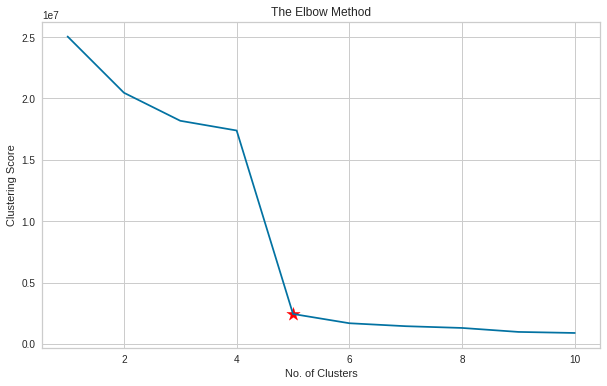

In [44]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
    

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

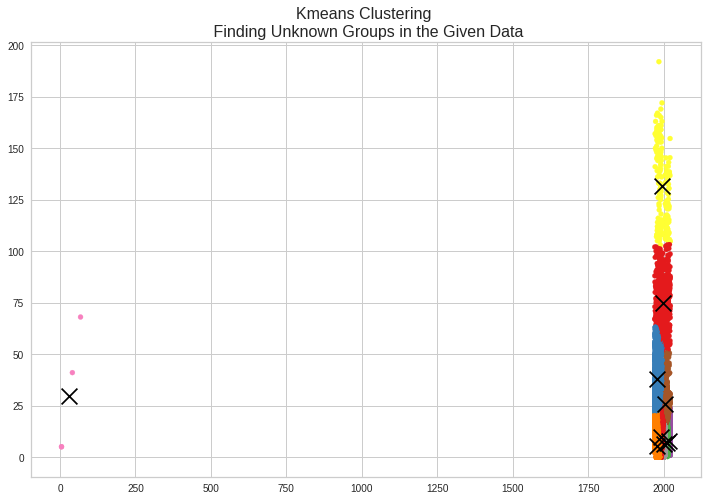

In [45]:
fig = plt.figure(figsize=(12,8))


plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Given Data", fontsize=16)
plt.show()

**3D Clustering all turkey**

In [46]:
df5=data6
df5.head()

No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   

                              Yer         new         new2  
0  GIRIT ADASI ACIKLARI (AKDENIZ)  2021-03-31  2021.243836  
1   KUSADASI KORFEZI (EGE DENIZI)  2021-03-30  2021.241096  
2                         AKDENIZ  2021-03-28  2021.235616  
3                      EGE DENIZI  2021-03-28  2021.235616  
4                      EGE DENIZI  2021-03-28  2021.235616

In [47]:
df5['Olus tarihi']= pd.to_datetime(df5["Olus tarihi"])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           16018 non-null  int64         
 1   Olus tarihi  16018 non-null  datetime64[ns]
 2   Olus zamani  16018 non-null  object        
 3   Enlem        16018 non-null  int64         
 4   Boylam       16018 non-null  int64         
 5   Der(km)      16018 non-null  float64       
 6   xM           16018 non-null  float64       
 7   MD           16018 non-null  float64       
 8   Tip          16018 non-null  object        
 9   Yer          16018 non-null  object        
 10  new          16018 non-null  object        
 11  new2         16018 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 2.2+ MB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
import time
df5['Date'] = df5['Olus tarihi'].dt.strftime('%d%m%Y')
df5['Date2'] = df5['Olus tarihi'].dt.strftime('%m%Y')
df5.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021-03-31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021-03-30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021-03-28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021-03-28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021-03-28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   

                              Yer         new         new2      Date   Date2  
0  GIRIT ADASI ACIKLARI (AKDENIZ)  2021-03-31  2021.243836  31032021  032021  
1   KUSADASI KORFEZI (EGE DENIZI)  2021-03-30  2021.241096  30032021  032021  
2                         AKDENIZ  2021-03-28  2021.235616  28032021  032021  
3                      EGE DENIZI  2021-03-28  2021.235616  28032021  032021  
4                      EGE DENIZI  2021-03-28  2021.235616  28032021  032021

In [49]:
df5['Date'] = pd.to_numeric(df5['Date'],errors = 'coerce')
df5['Date2'] = pd.to_numeric(df5['Date2'],errors = 'coerce')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16018 entries, 0 to 16021
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           16018 non-null  int64         
 1   Olus tarihi  16018 non-null  datetime64[ns]
 2   Olus zamani  16018 non-null  object        
 3   Enlem        16018 non-null  int64         
 4   Boylam       16018 non-null  int64         
 5   Der(km)      16018 non-null  float64       
 6   xM           16018 non-null  float64       
 7   MD           16018 non-null  float64       
 8   Tip          16018 non-null  object        
 9   Yer          16018 non-null  object        
 10  new          16018 non-null  object        
 11  new2         16018 non-null  float64       
 12  Date         16018 non-null  int64         
 13  Date2        16018 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 2.5+ MB


In [51]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [52]:
df5['year'] = pd.DatetimeIndex(df5['Olus tarihi']).year

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
# input matrix for segmentation
z = df5[['Enlem','Boylam','Der(km)', 'new2']].values
a= df5[['Enlem','Boylam','Der(km)', 'Date2']].values

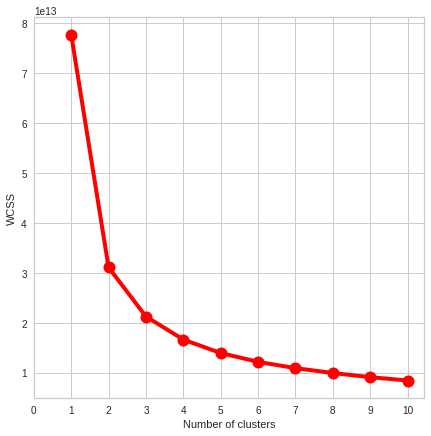

In [54]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(a)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

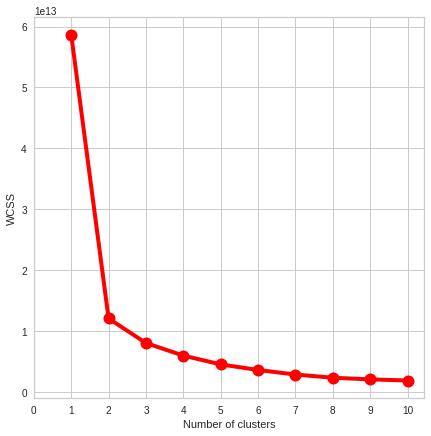

In [55]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(z)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(z)

In [57]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters2 = model.fit_predict(a)

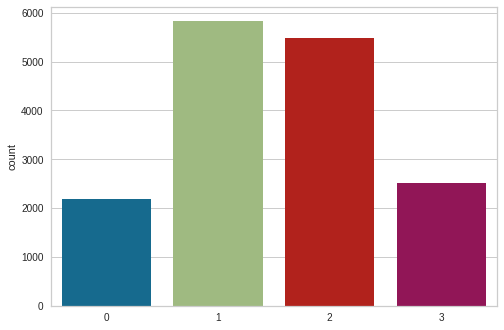

In [58]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters2)

In [59]:
print(a[y_clusters2 == 0,1][1])
print(a[y_clusters2 == 0,2][1])
print(a[y_clusters2 == 0,3][1])

392180.0
2.9
122020.0


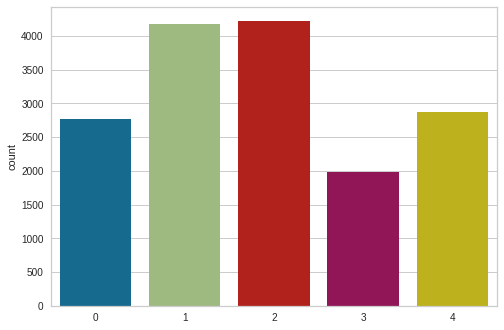

In [60]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [61]:
print(z[y_clusters == 0,0][1])
print(z[y_clusters == 0,1][1])
print(z[y_clusters == 0,3][1])

397580.0
436788.0
2021.1917808219177


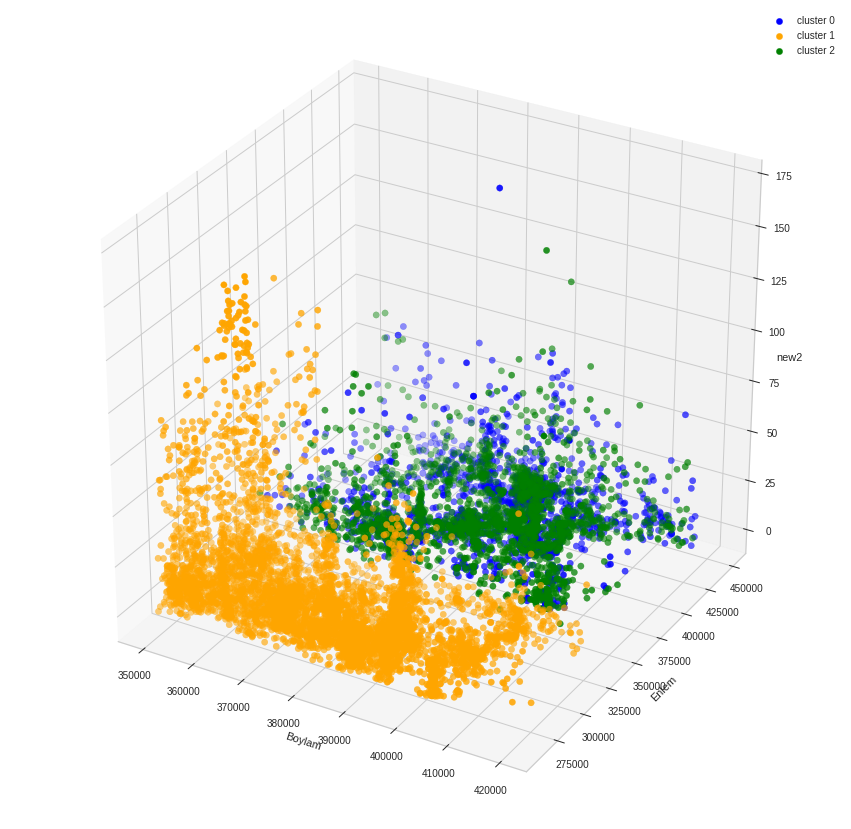

In [62]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a[y_clusters2 == 0,0],a[y_clusters2 == 0,1],a[y_clusters2 == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(a[y_clusters2 == 1,0],a[y_clusters2 == 1,1],a[y_clusters2 == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(a[y_clusters2 == 3,0],a[y_clusters2 == 3,1],a[y_clusters2 == 3,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Boylam')
ax.set_ylabel('Enlem')
ax.set_zlabel('new2')
ax.legend()
plt.show()

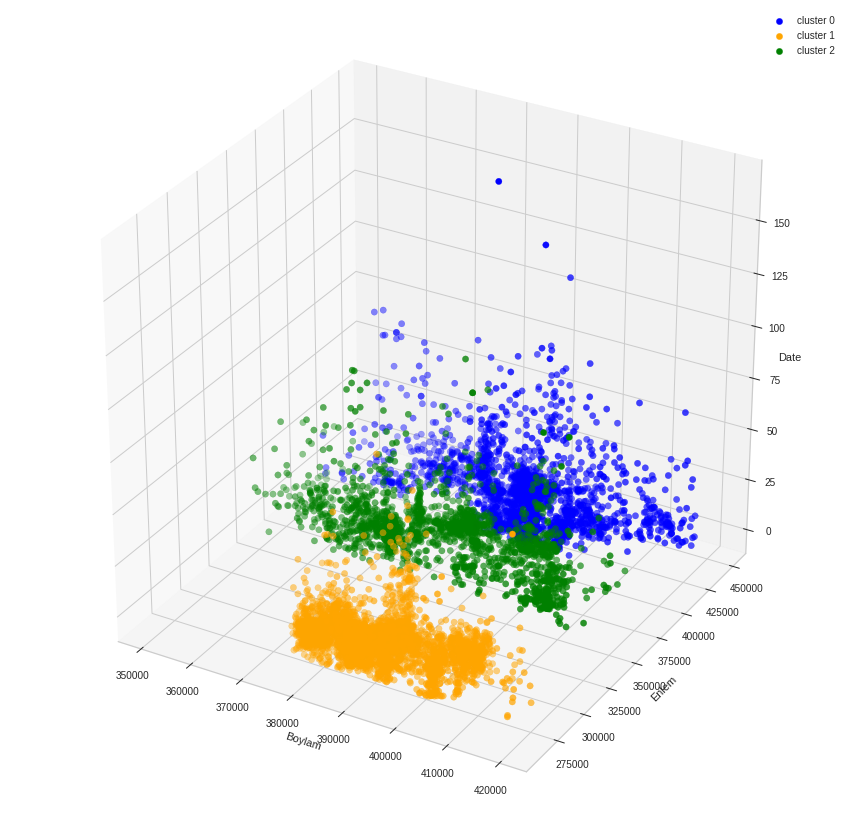

In [63]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z[y_clusters == 0,0],z[y_clusters == 0,1],z[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(z[y_clusters == 1,0],z[y_clusters == 1,1],z[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(z[y_clusters == 3,0],z[y_clusters == 3,1],z[y_clusters == 3,2], s = 40 , color = 'green', label = "cluster 2")
ax.set_xlabel('Boylam')
ax.set_ylabel('Enlem')
ax.set_zlabel('Date')
ax.legend()
plt.show()

**Ege Bölgesi Derinlik - Zaman Clustering**

In [64]:
#df2 = data5.drop(data5[data5['Yer'] != 'KUSADASI KORFEZI (EGE DENIZI)'].index)

In [65]:
df3 = data5.drop(data5[data5['Enlem'] > 390000].index)

In [66]:
df2 = df3.drop(df3[df3['Boylam'] > 280000].index)

In [67]:
df2.head()

No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   

                              Yer  
0  GIRIT ADASI ACIKLARI (AKDENIZ)  
1   KUSADASI KORFEZI (EGE DENIZI)  
2                         AKDENIZ  
3                      EGE DENIZI  
4                      EGE DENIZI

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4497 entries, 0 to 16021
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           4497 non-null   int64  
 1   Olus tarihi  4497 non-null   object 
 2   Olus zamani  4497 non-null   object 
 3   Enlem        4497 non-null   int64  
 4   Boylam       4497 non-null   int64  
 5   Der(km)      4497 non-null   float64
 6   xM           4497 non-null   float64
 7   MD           4497 non-null   float64
 8   Tip          4497 non-null   object 
 9   Yer          4497 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 386.5+ KB


In [69]:
df2['year'] = pd.DatetimeIndex(df2['Olus tarihi']).year

In [70]:
#df2[ (df2['year'] == 1999)]

In [71]:
df2.head()


No     Olus tarihi  Olus zamani   Enlem  Boylam  Der(km)   xM   MD Tip  \
0       1  2021.03.31  23:09:45.03  350232  271395     12.0  3.5  0.0  Ke   
1       2  2021.03.30  20:54:01.35  378915  271335      4.2  3.5  0.0  Ke   
2       3  2021.03.28  23:26:11.93  358712  274998     10.2  3.6  0.0  Ke   
3       4  2021.03.28  13:26:32.30  389575  260637      5.0  3.5  0.0  Ke   
4       5  2021.03.28  04:46:16.87  388995  260152      8.6  3.5  0.0  Ke   

                              Yer  year  
0  GIRIT ADASI ACIKLARI (AKDENIZ)  2021  
1   KUSADASI KORFEZI (EGE DENIZI)  2021  
2                         AKDENIZ  2021  
3                      EGE DENIZI  2021  
4                      EGE DENIZI  2021

/opt/conda/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/opt/conda/lib/python3.7/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



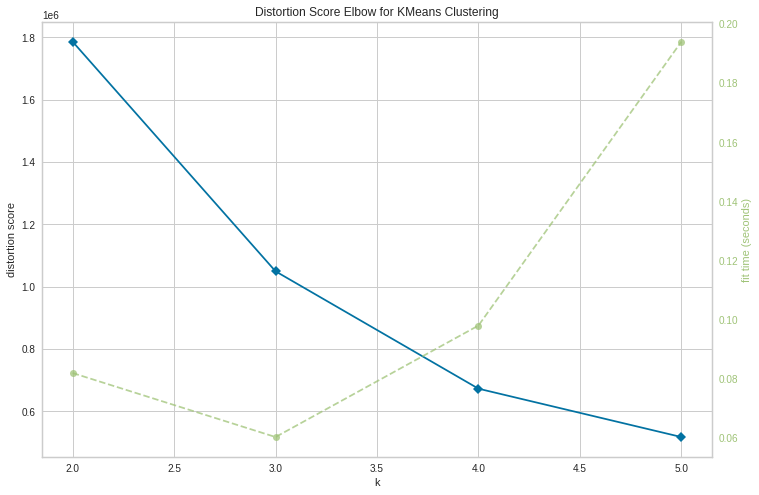

In [72]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df2.head()


X = df2[["year", "Der(km)"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof() 

In [73]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=10)  
kmeans.fit(X)

KMeans(n_clusters=10)

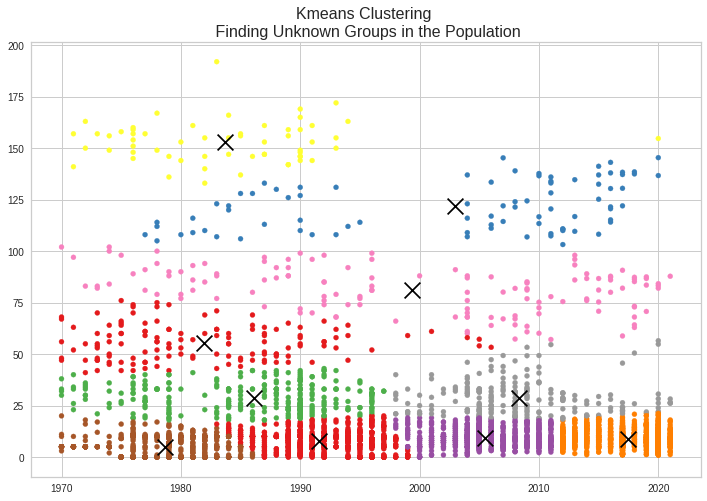

In [74]:
fig = plt.figure(figsize=(12,8))


plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

**3D Clustering Ege Bölgesi**

In [75]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [76]:
# input matrix for segmentation
x = df2[['Enlem','Boylam','Der(km)', 'year']].values

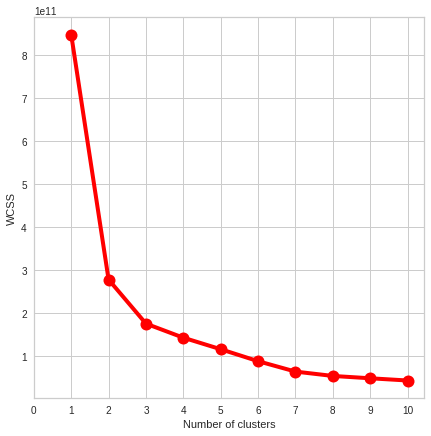

In [77]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [78]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(x)

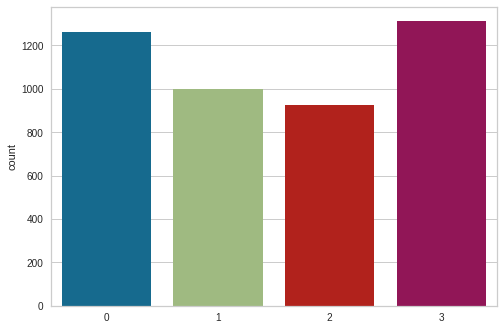

In [79]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [80]:
print(x[y_clusters == 0,0][1])
print(x[y_clusters == 0,1][1])
print(x[y_clusters == 0,2][1])

358712.0
274998.0
10.2


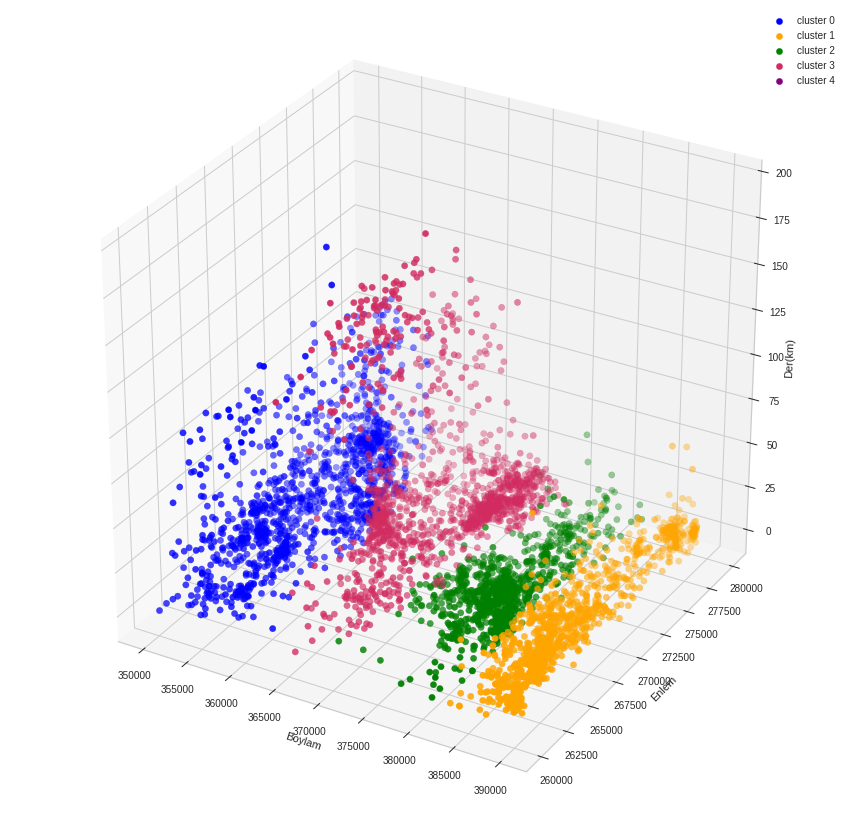

In [81]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(x[y_clusters == 3,0],x[y_clusters == 3,1],x[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(x[y_clusters == 4,0],x[y_clusters == 4,1],x[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('Boylam')
ax.set_ylabel('Enlem')
ax.set_zlabel('Der(km)')
ax.legend()
plt.show()

**3D Clustering Ege Bölgesi year**

In [82]:
# input matrix for segmentation
y = df2[['Enlem','Boylam','year']].values

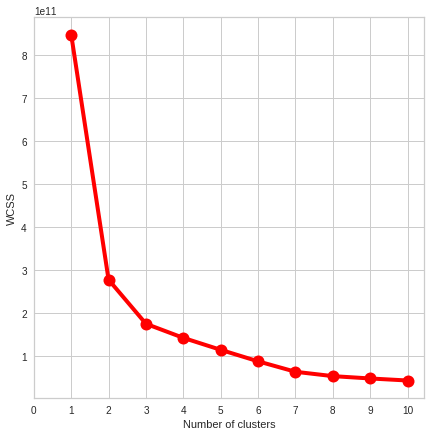

In [83]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(y)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [84]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(y)

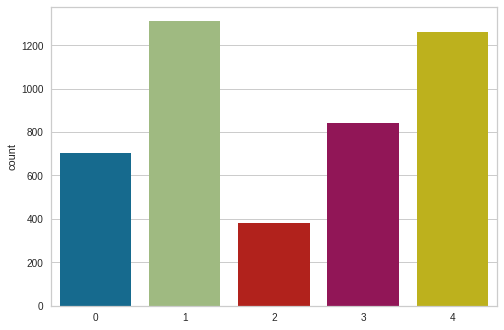

In [85]:
# countplot to check the number of clusters and number of customers in each cluster
sns.countplot(y_clusters)

In [86]:
print(y[y_clusters == 0,0][1])
print(y[y_clusters == 0,1][1])
print(y[y_clusters == 0,2][1])

388995
260152
2021


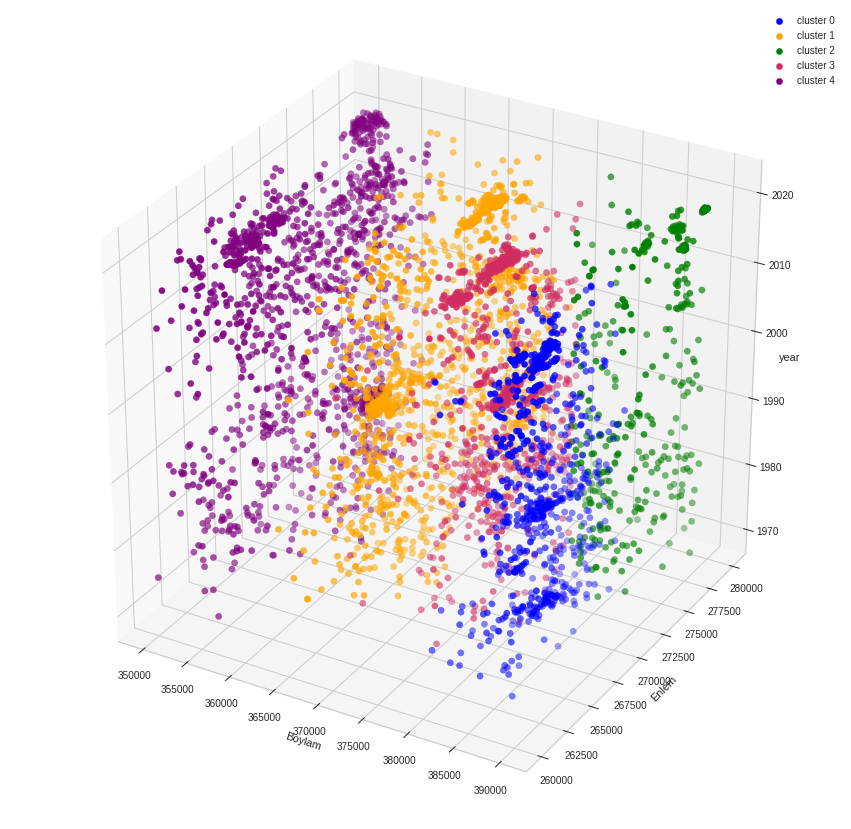

In [87]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[y_clusters == 0,0],y[y_clusters == 0,1],y[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(y[y_clusters == 1,0],y[y_clusters == 1,1],y[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(y[y_clusters == 2,0],y[y_clusters == 2,1],y[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(y[y_clusters == 3,0],y[y_clusters == 3,1],y[y_clusters == 3,2], s = 40 , color = '#D12B60', label = "cluster 3")
ax.scatter(y[y_clusters == 4,0],y[y_clusters == 4,1],y[y_clusters == 4,2], s = 40 , color = 'purple', label = "cluster 4")

ax.set_xlabel('Boylam')
ax.set_ylabel('Enlem')
ax.set_zlabel('year')
ax.legend()
plt.show()

**Datetime to float **

In [88]:
#df2['zaman'] = pd.DatetimeIndex(df2['Olus tarihi']).year
#df2['zaman2']=pd.DatetimeIndex(df2['Olus tarihi']).month
#df2['zaman3']=pd.DatetimeIndex(df2['Olus tarihi']).day
#df2['zaman4']=pd.DatetimeIndex(df2['Olus zamani']).hour
#df2['zaman5']=pd.DatetimeIndex(df2['Olus zamani']).minute
#df2['zaman6']=pd.DatetimeIndex(df2['Olus zamani']).second
#df2.head()

In [89]:
#df2['zaman7']=pd.to_numeric(df2['Olus tarihi'])
#df2.head()

In [90]:
#df2['zaman'] = df2['zaman'].astype(float)
#df2['zaman2'] = df2['zaman2'].astype(float)
#df2['zaman3'] = df2['zaman3'].astype(float)
#df2['zaman4'] = df2['zaman4'].astype(float)
#df2['zaman5'] = df2['zaman5'].astype(float)
#df2['zaman6'] = df2['zaman6'].astype(float)
#df2.info()

In [91]:
df2['Olus zamani']= pd.to_datetime(df2["Olus zamani"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4497 entries, 0 to 16021
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   No           4497 non-null   int64         
 1   Olus tarihi  4497 non-null   object        
 2   Olus zamani  4497 non-null   datetime64[ns]
 3   Enlem        4497 non-null   int64         
 4   Boylam       4497 non-null   int64         
 5   Der(km)      4497 non-null   float64       
 6   xM           4497 non-null   float64       
 7   MD           4497 non-null   float64       
 8   Tip          4497 non-null   object        
 9   Yer          4497 non-null   object        
 10  year         4497 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 421.6+ KB


In [92]:
import time
df2['Time'] = df2['Olus zamani'].dt.strftime('%H%M%S%f')
df2.head()

No     Olus tarihi             Olus zamani   Enlem  Boylam  Der(km)   xM  \
0       1  2021.03.31 2021-06-17 23:09:45.030  350232  271395     12.0  3.5   
1       2  2021.03.30 2021-06-17 20:54:01.350  378915  271335      4.2  3.5   
2       3  2021.03.28 2021-06-17 23:26:11.930  358712  274998     10.2  3.6   
3       4  2021.03.28 2021-06-17 13:26:32.300  389575  260637      5.0  3.5   
4       5  2021.03.28 2021-06-17 04:46:16.870  388995  260152      8.6  3.5   

    MD Tip                             Yer  year          Time  
0  0.0  Ke  GIRIT ADASI ACIKLARI (AKDENIZ)  2021  230945030000  
1  0.0  Ke   KUSADASI KORFEZI (EGE DENIZI)  2021  205401350000  
2  0.0  Ke                         AKDENIZ  2021  232611930000  
3  0.0  Ke                      EGE DENIZI  2021  132632300000  
4  0.0  Ke                      EGE DENIZI  2021  044616870000

In [93]:
#df2['Date'] = pd.to_numeric(df2['Date'],errors = 'coerce')
df2['Time'] = pd.to_numeric(df2['Time'],errors = 'coerce')

In [94]:
#df2.info()

In [95]:
#df2['year'] = pd.DatetimeIndex(df2['Olus tarihi']).year

In [96]:
#df2['Olus tarihi'].values.astype(float)

In [97]:
#from datetime import datetime
#df2['new2'] = (float(df2['Olus tarihi'].dt.strftime("%j"))-1) / 366 + float(df2['Olus tarihi'].dt.strftime("%Y"))

In [98]:
#df2.head()

In [99]:
#df2.info()

In [100]:
#from datetime import datetime
#for x in df2['Date']:
#    timestamp = x
#    df2['timestamp'] = datetime.fromtimestamp(timestamp)
#print(df2['timestamp'])

In [101]:
#df2.drop(df2[df2['Enlem'] < 386000].index, inplace = True)
#df2.drop(df2[df2['Enlem'] > 386800].index, inplace = True)
#df2.drop(df2[df2['Boylam'] < 270000].index, inplace = True)
#df2.drop(df2[df2['Boylam'] > 275500].index, inplace = True)
#df2.head()